# A. Perkenalan

#### Anggota

- Paizal Merdijaya
- Alviatul Nazila
- Clarissa Sanindita Reikisyifa

#### Latar Belakang

Dalam dunia yang semakin bergantung pada data, keputusan yang didasarkan pada analisis data yang akurat dan tepat waktu menjadi sangat penting. Khususnya dalam sektor meteorologi, prediksi cuaca memainkan peran krusial dalam berbagai aspek kehidupan dan bisnis. Prediksi yang akurat dapat membantu dalam perencanaan kegiatan sehari-hari, pertanian, penerbangan, dan manajemen bencana. Oleh karena itu, memanfaatkan machine learning untuk memprediksi kondisi cuaca merupakan langkah maju dalam bidang ini.

#### Data yang Digunakan

Dataset yang akan digunakan dalam proyek ini adalah "weatherAUS.csv", yang berisi pengamatan cuaca harian dari berbagai lokasi di Australia. Dataset ini mencakup sejumlah variabel meteorologi seperti suhu, tekanan, kelembapan, curah hujan, dan lain-lain.
- Jumlah data: 142193
- Kelas: Target yang akan kita prediksi adalah kejadian hujan pada hari berikutnya, yang merupakan variabel biner (Ya atau Tidak).
- Sumber: Kaggle
- Link dataset : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

#### Objective yang Ingin Dicapai

Tujuan utama dari proyek ini adalah untuk mengembangkan model yang mampu memprediksi apakah akan terjadi hujan di Australia pada hari berikutnya dengan menggunakan teknik Logistic Regression dan Support Vector Machine (SVM). Kami akan mengevaluasi dan membandingkan performa kedua model tersebut berdasarkan metrik klasifikasi yang relevan seperti akurasi, presisi, recall, dan F1-Score. Selain itu, kami juga akan mengimplementasikan beberapa teknik preprocessing data untuk meningkatkan kinerja model. Akhirnya, kita akan mencoba mendeploy model yang telah dilatih ke Heroku sebagai API untuk memungkinkan prediksi melalui permintaan HTTP.

# B. Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# C. Data Loading

In [6]:
df = pd.read_csv('weatherAUS.csv')
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Terdapat 145459 baris dan 23 kolom

# D. Data Cleaning

<h3> Pengecekan nilai null dan nilai duplikat </h3>

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Pengecekan menunjukkan tidak adanya data duplikat, dengan jumlah nol. Selain itu, terdapat beberapa kolom yang memiliki nilai null.

<h3> Normalisasi Kolom </h3>

In [9]:
df.columns = [column.lower() for column in df.columns]

Melakukan perubahan pada nama kolom, yang semula tertulis dengan huruf kapital, menjadi seluruhnya huruf kecil untuk memastikan keseragaman dan mempermudah pengelolaan data. Langkah ini membantu dalam menghindari kesalahan yang disebabkan oleh perbedaan penulisan huruf besar dan kecil, serta memudahkan dalam melakukan pencarian dan pengolahan data lebih lanjut

# E. Exploratory Data Analysis (EDA)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    82670 non-null   float64
 6   sunshine       75625 non-null   float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       89572 non-null

In [11]:
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<h3>Distribusi Frekuensi Suhu Maksimum </h3>

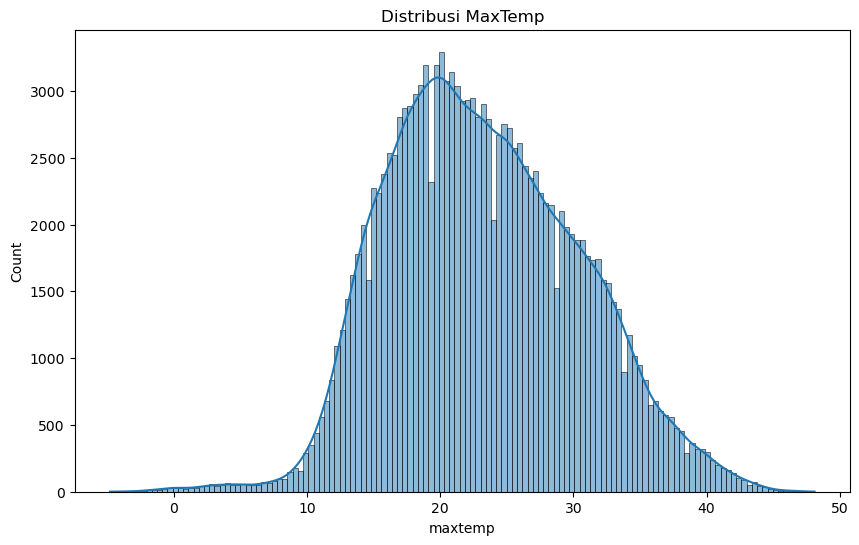

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['maxtemp'], kde=True)
plt.title('Distribusi MaxTemp')
plt.show()

Grafik ini menjelaskan distribusi frekuensi suhu maksimum (maxtemp), dengan garis distribusi yang menunjukkan kepadatan probabilitas. Sumbu horizontal mengindikasikan nilai suhu maksimum, sementara sumbu vertikal menunjukkan jumlah pengamatan untuk setiap kisaran nilai suhu. Bentuk grafik menyerupai distribusi normal, dengan mayoritas data terkonsentrasi di sekitar nilai tengah antara 20 hingga 30, menurun frekuensinya ke arah nilai yang lebih rendah atau lebih tinggi, mengindikasikan bahwa suhu maksimum cenderung sering muncul dalam kisaran tersebut dan jarang mencapai ekstrem.

<h3>Heatmap Korelasi</h3>

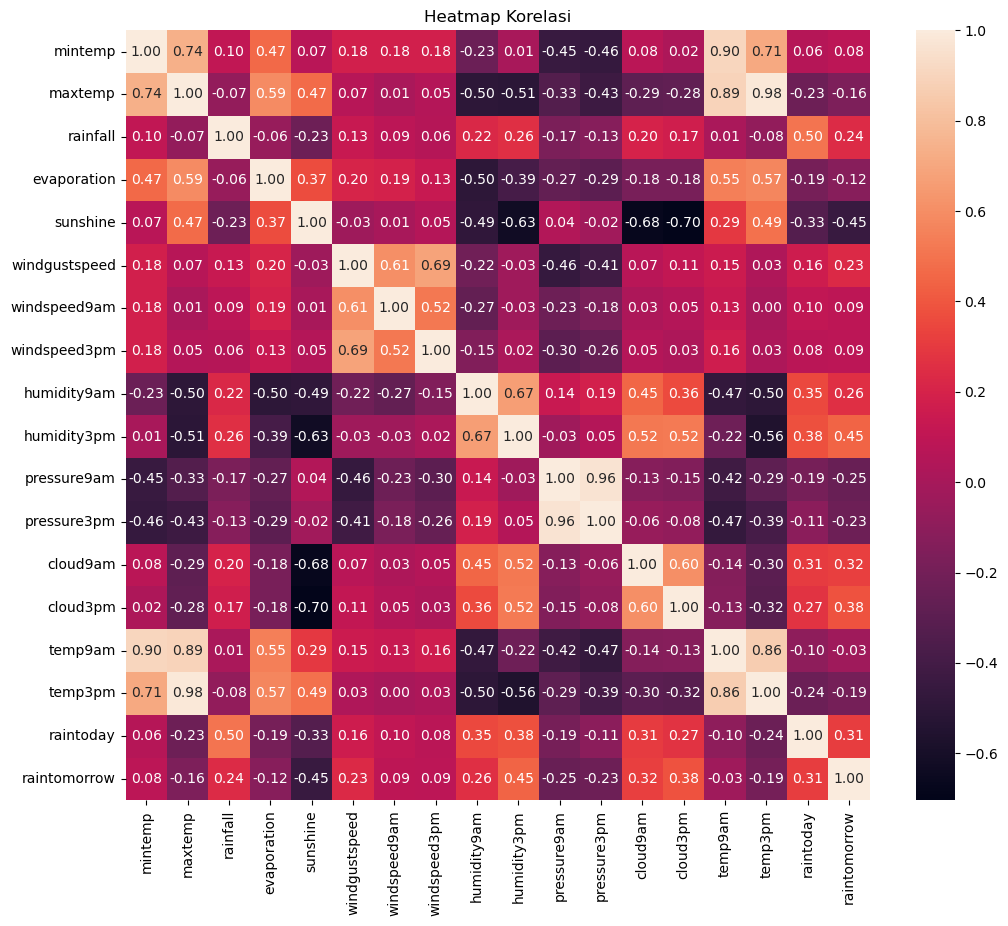

In [13]:
binary_columns = ['raintoday', 'raintomorrow']
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

Visualisasi diatas merupakan heatmap korelasi yang menunjukkan hubungan antara berbagai variabel meteorologis. Nilai korelasi berkisar dari -1 hingga 1, diwakili oleh gradasi warna dari coklat muda hingga coklat gelap. Nilai yang mendekati 1 menandakan korelasi positif yang kuat, sedangkan nilai yang mendekati -1 menandakan korelasi negatif yang kuat. Nilai dekat 0 menunjukkan tidak ada korelasi yang signifikan. Misalnya, mintemp dan maxtemp menunjukkan korelasi positif yang sangat kuat (0.74), yang berarti bahwa ketika suhu minimum naik, suhu maksimum cenderung juga naik. Sementara itu, mintemp dan rainfall memiliki korelasi yang lebih rendah (0.10), yang menunjukkan hubungan yang kurang signifikan. Heatmap ini membantu dalam mengidentifikasi pola dan hubungan antar variabel yang bisa sangat berguna dalam analisis statistik lanjutan.

<h3>Rata-Rata Curah Hujan per Lokasi</h3>

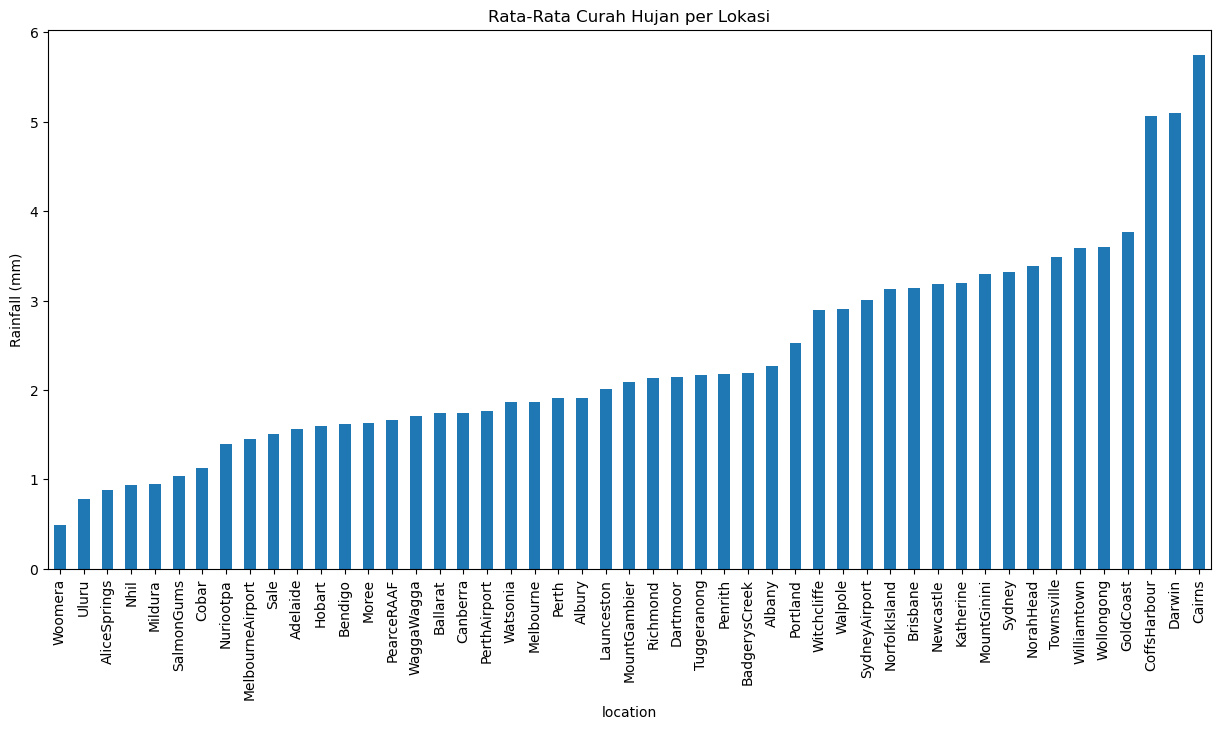

In [14]:
grouped_data = df.groupby('location')['rainfall'].mean().sort_values()
plt.figure(figsize=(15, 7))
grouped_data.plot(kind='bar')
plt.title('Rata-Rata Curah Hujan per Lokasi')
plt.ylabel('Rainfall (mm)')
plt.show()

Diagram batang di atas menggambarkan rata-rata curah hujan per lokasi. Sumbu horizontal menampilkan nama-nama lokasi, sementara sumbu vertikal menunjukkan rata-rata curah hujan dalam milimeter (mm). Panjang batang berbanding lurus dengan besar curah hujan rata-rata; semakin tinggi batang, semakin tinggi curah hujan di lokasi tersebut. Dapat diamati bahwa terdapat variasi yang signifikan dalam rata-rata curah hujan antar lokasi, dengan beberapa lokasi seperti Cairns dan Darwin memiliki curah hujan yang lebih tinggi dibandingkan dengan lokasi lain seperti Woomera dan Alice Springs yang memiliki batang lebih rendah, menunjukkan curah hujan yang lebih sedikit. Grafik ini membantu dalam membandingkan iklim berbagai lokasi berdasarkan jumlah rata-rata curah hujan mereka.


<h3>Raintoday vs Raintomorrow</h3>

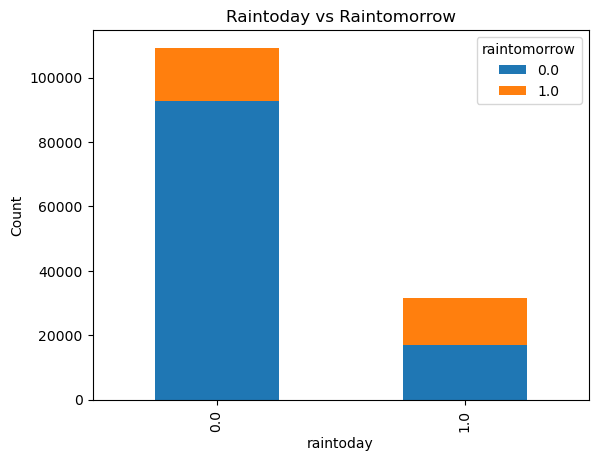

In [15]:
pd.crosstab(df['raintoday'], df['raintomorrow']).plot(kind='bar', stacked=True)
plt.title('Raintoday vs Raintomorrow')
plt.ylabel('Count')
plt.show()

Diagram batang di atas membandingkan jumlah hari dengan hujan hari ini (raintoday) dan prediksi hujan esok hari (raintomorrow). Sumbu horizontal membedakan antara hari tanpa hujan (0.0) dan hari dengan hujan (1.0) untuk hari ini, sedangkan sumbu vertikal menunjukkan jumlah (count) hari-hari tersebut. Warna biru merepresentasikan hari-hari tanpa hujan esok hari (raintomorrow = 0.0), dan warna oranye untuk hari-hari dengan hujan esok hari (raintomorrow = 1.0). Dari diagram ini, kita bisa melihat bahwa jumlah hari tanpa hujan hari ini yang diikuti oleh hari tanpa hujan esok hari jauh lebih banyak dibandingkan dengan hari hujan yang diikuti oleh hari hujan esok harinya. Selain itu, jumlah hari hujan hari ini yang diikuti oleh hari tanpa hujan esok hari juga tampak signifikan, menunjukkan variabilitas kondisi cuaca dari hari ke hari.


# F. Data Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           145460 non-null  object 
 1   location       145460 non-null  object 
 2   mintemp        143975 non-null  float64
 3   maxtemp        144199 non-null  float64
 4   rainfall       142199 non-null  float64
 5   evaporation    82670 non-null   float64
 6   sunshine       75625 non-null   float64
 7   windgustdir    135134 non-null  object 
 8   windgustspeed  135197 non-null  float64
 9   winddir9am     134894 non-null  object 
 10  winddir3pm     141232 non-null  object 
 11  windspeed9am   143693 non-null  float64
 12  windspeed3pm   142398 non-null  float64
 13  humidity9am    142806 non-null  float64
 14  humidity3pm    140953 non-null  float64
 15  pressure9am    130395 non-null  float64
 16  pressure3pm    130432 non-null  float64
 17  cloud9am       89572 non-null

<h3>Eliminasi Kolom</h3>

In [17]:
df = df.drop(columns=['windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'date', 'location'], errors='ignore')

Melalui analisis eksplorasi atau feature selection ditunjukkan bahwa kolom-kolom ini tidak memberikan peningkatan kinerja model dan oleh karena itu, dianggap baik untuk dihapus

<h3>Penghapusan Nilai Null</h3>

In [18]:
df=df.dropna(subset=['raintomorrow'])

In [19]:
numeric_columns = df.select_dtypes(exclude=['object'])
numeric_columns = numeric_columns.fillna(numeric_columns.mean())

df[numeric_columns.columns] = numeric_columns

<h3>Pemisahan Data Fitur dan Target</h3>

In [20]:
X = df.drop('raintomorrow', axis=1)
y = df["raintomorrow"].values

<h3>Pembagian Data Train dan Test</h3>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Parameter test_size=0.2 menunjukkan bahwa 20% dari data akan digunakan untuk pengujian, sementara sisanya (80%) akan digunakan untuk pelatihan.

<h3>Normalisasi Data</h3>

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# G. Pendefinisian Model

<h3>Logistic Regression</h3>

In [23]:
logreg = LogisticRegression()

<h3>SVM</h3>

In [24]:
svm = SVC(probability=True)

# H. Pelatihan Model

In [25]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
accuracy_logreg = logreg.score(X_train_scaled, y_train)
print(f"Akurasi pelatihan Regresi Logistik: {accuracy_logreg}")

Akurasi pelatihan Regresi Logistik: 0.8419659968001125


In [27]:
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [28]:
accuracy_svm = svm.score(X_train_scaled, y_train)
print(f"Akurasi pelatihan SVM: {accuracy_svm}")

Akurasi pelatihan SVM: 0.8560665998558292


# I. Evaluasi Model


## SVM

In [29]:
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)

In [30]:
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)

SVM Accuracy: 0.8490101621013397
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     22098
         1.0       0.77      0.46      0.58      6341

    accuracy                           0.85     28439
   macro avg       0.82      0.71      0.74     28439
weighted avg       0.84      0.85      0.83     28439



In [31]:
svm_cm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion Matrix:\n", svm_cm)

SVM Confusion Matrix:
 [[21223   875]
 [ 3419  2922]]


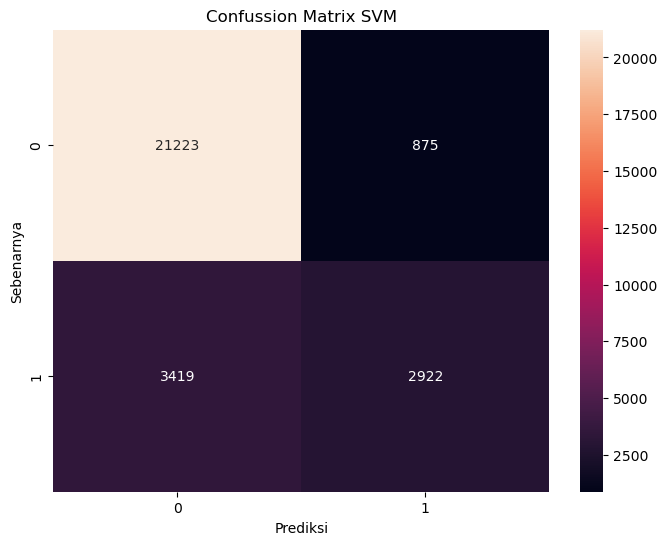

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confussion Matrix SVM')
plt.show()

In [33]:
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])
print("SVM ROC-AUC:", svm_roc_auc)

SVM ROC-AUC: 0.8361280981598664


In [34]:
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

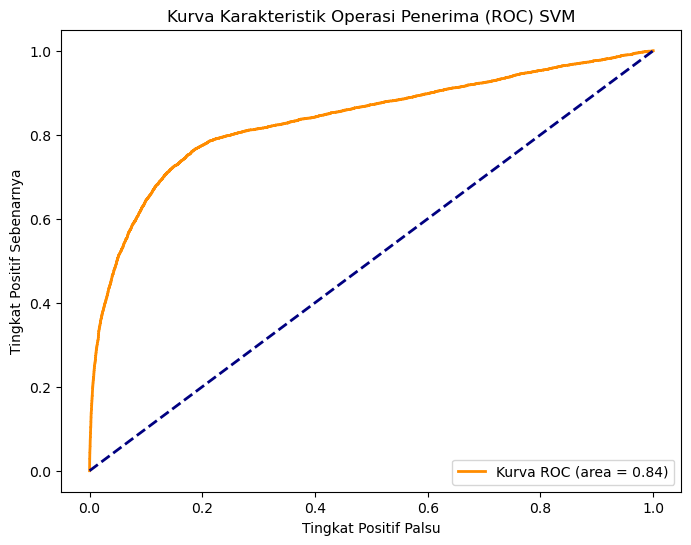

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tingkat Positif Palsu')
plt.ylabel('Tingkat Positif Sebenarnya')
plt.title('Kurva Karakteristik Operasi Penerima (ROC) SVM')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [36]:
# Prediksi dan evaluasi Logistic Regression
logreg_pred = logreg.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_classification_report = classification_report(y_test, logreg_pred)


In [37]:
# Visualisasi hasil
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:\n", logreg_classification_report)

Logistic Regression Accuracy: 0.8378986602904462
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22098
         1.0       0.70      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



In [38]:
# Confusion matrix dan ROC-AUC untuk kedua model
logreg_cm = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Confusion Matrix:\n", logreg_cm)


Logistic Regression Confusion Matrix:
 [[20769  1329]
 [ 3281  3060]]


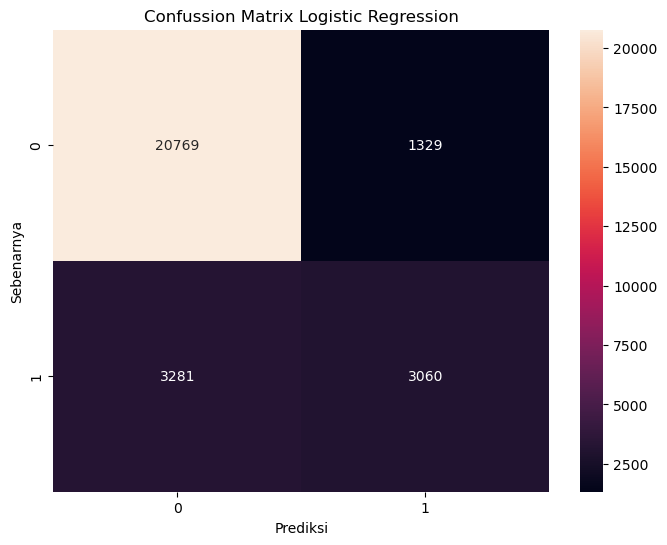

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, fmt='d')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confussion Matrix Logistic Regression')
plt.show()

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

In [41]:
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
print("Logistic Regression ROC-AUC:", logreg_roc_auc)

Logistic Regression ROC-AUC: 0.8574748654789451


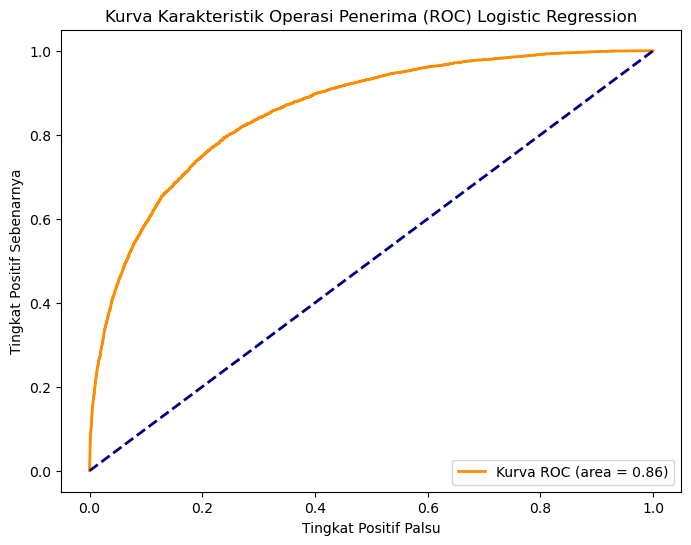

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tingkat Positif Palsu')
plt.ylabel('Tingkat Positif Sebenarnya')
plt.title('Kurva Karakteristik Operasi Penerima (ROC) Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# K. Pengambilan Kesimpulan


Setelah menjalankan proses analisis dan pemodelan data cuaca Australia dari awal hingga akhir, kami dapat menyimpulkan bahwa kedua model klasifikasi yang diuji Regresi Logistik dan SVM telah berhasil dilatih dan dievaluasi dengan akurasi yang baik. Dalam proses ini, kami telah membersihkan dan memproses dataset yang cukup besar, mengatasi tantangan seperti missing values dan kategorisasi data. Regresi Logistik, walaupun sederhana, menunjukkan kemampuan yang baik dalam memprediksi hari tanpa hujan, namun kurang efektif dalam mendeteksi hari hujan. Di sisi lain, SVM menunjukkan peningkatan dalam presisi, meskipun kedua model memiliki ruang untuk peningkatan, khususnya dalam meningkatkan recall untuk prediksi hujan. Pemilihan fitur, tuning hyperparameter, dan penggunaan teknik seperti cross-validation mungkin dapat meningkatkan performa model. Kesimpulannya, proses ini menggarisbawahi pentingnya pemrosesan data yang teliti dan pemilihan model yang tepat dalam tugas prediksi cuaca, yang memiliki implikasi signifikan dalam banyak sektor, termasuk keselamatan publik dan pertanian.

# L. Export Model dalam Bentuk Pickel

In [43]:
model_path = 'svm_model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(svm, file)

model_path


'svm_model.pkl'